In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wanted_columns = [
'Key_Words',
'Misinfo_Type',
'Distrib_Channel',
'Source_Description',
'Source',
'Motive',
'ChainMsg_or_Email',
'Main_Narrative',
'Twitter_Reference'
]
wanted_columns.reverse()

def count(df, input):
    n = []
    for item in df[input].dropna():
        split = item.split(',')
        for word in split:
            if ',' in word:
                word = word[0:len(word)-1]
            word=word.strip()
            if (word).lower().capitalize()=='Political actors':
                n.append('Political actor')
            elif (word).lower().capitalize()=='Individual actors':
                n.append('Individual actor')
            else:
                n.append((word).lower().capitalize())
    return pd.DataFrame(n).value_counts()

def pieChart(df, input, p1=0,p2=100):
    e = []
    n = pd.DataFrame()
    n['L']=count(df,input)
    n = n[(n['L'].quantile(p2/100)>=n['L']) & (n['L'].quantile(p1/100)<=n['L'])]
    for i in n['L'].index.to_list():
        e.append(i[0])
    plt.pie(n['L'].to_list(),labels = e, autopct='%1.1f%%', startangle=90)

def select(column,selection):
    return misinfo[misinfo[column]==selection]

In [7]:
asdf = pd.read_csv('misinfo.csv')

In [8]:
misinfo=pd.DataFrame()
for column in wanted_columns:
    misinfo[column]=asdf[column]

In [9]:
conspiracy = select('Misinfo_Type','Conspiracy')

Individual actor    4548
Media                737
Political actor      288
State sponsors        74
Companies             34
State sponsor          2
dtype: int64

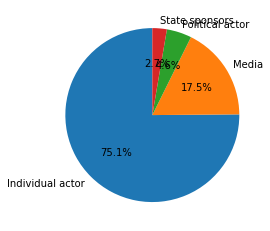

In [10]:
pieChart(conspiracy,'Source',1)
count(misinfo,'Source')

In [11]:
misinfo.head()

,Twitter_Reference,Main_Narrative,ChainMsg_or_Email,Motive,Source,Source_Description,Distrib_Channel,Misinfo_Type,Key_Words
0,0.0,Origin of the virus,0.0,Politics,Individual actor,General public,Youtube,Conspiracy,"Coronavirus, India, bat soup"
1,1.0,Emergency responses,0.0,Fear,Individual actor,General public,Twitter,False reporting,"Coronavirus, China, shooting"
2,1.0,Origin of the virus,0.0,Politics,Individual actor,General public,Twitter,False reporting,"Coronavirus, Chinese food, bat soup"
3,1.0,Emergency responses,1.0,Fear,Individual actor,General public,"Media, SMS",False reporting,"Coronavirus, NYPD, containment zone"
4,0.0,Emergency responses,1.0,Fear,Individual actor,General public,"Facebook, WhatsApp",False reporting,"Coronavirus, India, travel advisory"


In [12]:
downplay = select('Motive','Downplay severity')

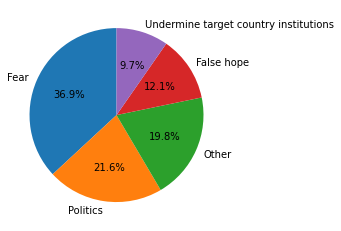

In [13]:
pieChart(misinfo,'Motive',50)

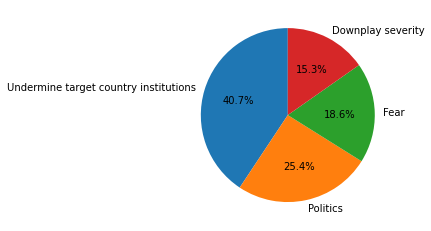

In [14]:
pieChart(select('Source','State sponsors'),'Motive',50)

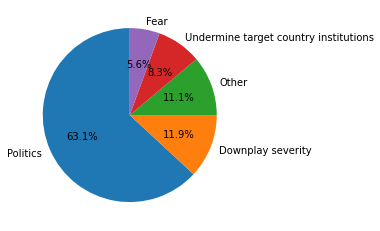

In [36]:
pieChart(select('Source','Political actor'),'Motive',50)

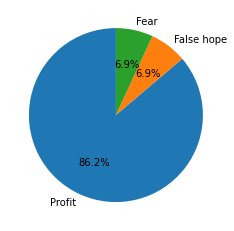

In [54]:
pieChart(select('Source','Companies'),'Motive',50)

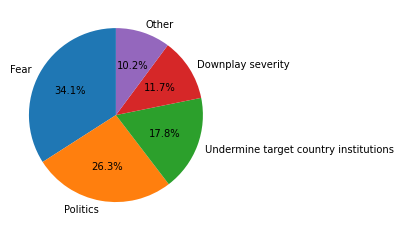

In [15]:
pieChart(conspiracy,'Motive',50)

In [16]:
twt = select('Distrib_Channel','Twitter')

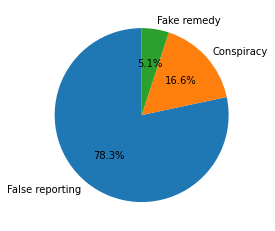

In [17]:
pieChart(twt, 'Misinfo_Type',0)

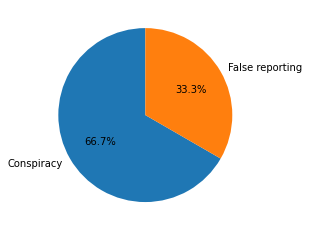

In [31]:
pieChart(downplay,'Misinfo_Type',0)

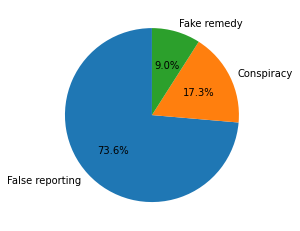

In [37]:
pieChart(misinfo, 'Misinfo_Type',0)

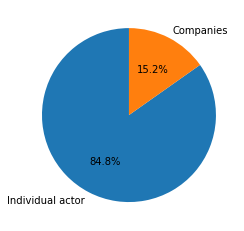

In [53]:
pieChart(select('Motive','Profit'),'Source',50)

In [42]:
select('Motive','Undermine target country institutions ')

,Twitter_Reference,Main_Narrative,ChainMsg_or_Email,Motive,Source,Source_Description,Distrib_Channel,Misinfo_Type,Key_Words
27,0.0,Weaponization or design,0.0,Undermine target country institutions,State sponsors,Russia,"News, Websites",Conspiracy,"Coronavirus, pro-Kremlin, US"
28,0.0,Weaponization or design,0.0,Undermine target country institutions,State sponsors,Russia,Media,Conspiracy,"Coronavirus, Russia, US bioweapons"
29,0.0,Weaponization or design,0.0,Undermine target country institutions,State sponsors,Iran,Media,Conspiracy,"Coronavirus, Iran, US bioweapons"
30,1.0,Weaponization or design,0.0,Undermine target country institutions,State sponsors,China,Twitter,Conspiracy,"Coronavirus, China, US bioweapons"
31,0.0,Weaponization or design,0.0,Undermine target country institutions,State sponsors,Iraq,Media,Conspiracy,"Coronavirus, Arab press, US bioweapons, Israel"
...,...,...,...,...,...,...,...,...,...
5555,0.0,Other,0.0,Undermine target country institutions,Individual actor,General Public,"Facebook, Telegram",False reporting,"Coronavirus, Germany, Spain, police, attack, n..."
5557,0.0,Government responses,0.0,Undermine target country institutions,Individual actor,General Public,"Facebook, Telegram",False reporting,"Coronavirus, compulsory vaccination, Germany, ..."
5578,1.0,Non-Government responses,0.0,Undermine target country institutions,Individual actor,General Public,Twitter,False reporting,"Coronavirus, New York Times, 90%, misreported,..."
5583,1.0,COVID-19 status of individuals,0.0,Undermine target country institutions,Individual actor,General Public,Twitter,False reporting,"Coronavirus, infected, foreigners, Japan"


In [46]:
count(misinfo,'Motive')

Fear                                     1749
Politics                                 1023
Other                                     937
False hope                                572
Undermine target country institutions     459
Downplay severity                         332
Help                                      222
Profit                                    195
Undermine target country                  123
dtype: int64

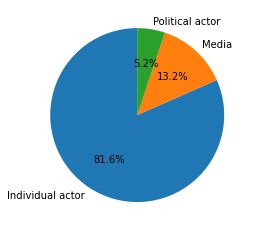

In [52]:
pieChart(misinfo,'Source',50)